<a href="https://colab.research.google.com/github/DimOriCoding/Artificial_Intelligence_II/blob/main/Artificial_Intelligence_II_Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
dataset = pd.read_csv('imdb-reviews.csv', sep = '\t')
print(dataset)
dataset.describe()
row_count_train = sum(1 for rows in dataset["url"])


                                                    url  rating  \
0      http://www.imdb.com/title/tt0120623/usercomments    10.0   
1      http://www.imdb.com/title/tt0043117/usercomments     9.0   
2      http://www.imdb.com/title/tt0043117/usercomments    10.0   
3      http://www.imdb.com/title/tt0835204/usercomments     4.0   
4      http://www.imdb.com/title/tt0499603/usercomments    10.0   
...                                                 ...     ...   
45003  http://www.imdb.com/title/tt0449000/usercomments     1.0   
45004  http://www.imdb.com/title/tt0109382/usercomments     1.0   
45005  http://www.imdb.com/title/tt0375560/usercomments     1.0   
45006  http://www.imdb.com/title/tt0165107/usercomments     1.0   
45007  http://www.imdb.com/title/tt0041513/usercomments    10.0   

                                                  review  
0      I thought this was a quiet good movie. It was ...  
1      Wagon Master is a very unique film amongst Joh...  
2      This film h

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

--2023-11-01 19:28:56--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2023-11-01 19:28:56--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2023-11-01 19:28:56--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [ ]:
import random
import os
import numpy as np
import torch
import torch.nn as nn


device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Device available for running: ")
print(device)




Device available for running: 
cpu


In [ ]:
#To preserve reproducibility
import random
import numpy as np
import torch.backends.cudnn
from numpy.random import MT19937
from numpy.random import RandomState, SeedSequence
def set_seed(SEED):
 random.seed(SEED)# Set python seed for custom operators.
 torch.manual_seed(SEED)
 rs = RandomState(MT19937(SeedSequence(SEED))) # If any of the libraries or code rely on NumPy seed the global NumPy RNG.
 np.random.seed(SEED)
 torch.cuda.manual_seed_all(SEED)
 torch.backends.cudnn.deterministic = True
 torch.backends.cudnn.benchmark = False

In [ ]:
def set_seed(seed = 1234):
    '''Sets the seed of the entire notebook so results are the same every time we run. This is for REPRODUCIBILITY.
    '''
    np.random.seed(seed)
    random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    # When running on the CuDNN backend, two further options must be set
    torch.backends.cudnn.deterministic = True
    # Set a fixed value for the hash seed
    os.environ['PYTHONHASHSEED'] = str(seed)

set_seed()

In [ ]:
import nltk
import string
import re
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('stopwords')
from collections import Counter

def remove_duplicates(text):

    # split input string separated by space
    text = text.split(" ")

    # now create dictionary using counter method
    # which will have strings as key and their
    # frequencies as value
    UniqW = Counter(text)

    # joins two adjacent elements in iterable way
    text = " ".join(UniqW.keys())
    return text

def basic_preprocessing(text):
  # Remove tags
  text = re.sub(r'@\s?\w+',' ',str(text))
  # Remove underscore characters
  text = re.sub(r'_', ' ', text)
  # remove numbers
  text = re.sub(r'\d+', '', text)
  # Remove \r and \n
  text = re.sub(r'[\r\n]',' ', text)
  # remove whitespace from text
  text =  " ".join(text.split())
  # Remove single characters
  text = re.sub(r'\s+[a-zA-Z]\s+', ' ',text)
  # Remove single characters from start
  text = re.sub(r'^[a-zA-Z]\s+', '', text)
  # Remove single characters from end
  text = re.sub(r'\s+[a-zA-Z]$', '', text)
  # Remove punctuation
  translator = str.maketrans('', '', string.punctuation)
  text =  text.translate(translator)
  # Removing prefixed 'b'
  text = re.sub(r'^b\s+', '', text)
    # Convert multiple spaces to single space and remove beginning and end spaces
  text = re.sub(r' +',' ',text).strip()
    # Convert to lowercase
  text = text.casefold()
  return text
#defining the function to remove stopwords from text. Also we will keep some stopwords like "not" because they are sometimes
#useful in the context of a text review
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    stop_words.remove('no')
    stop_words.remove('nor')
    stop_words.remove('not')
    stop_words.remove('don\'t')
    stop_words.remove('don')
    stop_words.remove('aren\'t')
    stop_words.remove('aren')
    stop_words.remove('couldn')
    stop_words.remove('couldn\'t')
    stop_words.remove('didn')
    stop_words.remove('didn\'t')
    stop_words.remove('doesn')
    stop_words.remove('doesn\'t')
    stop_words.remove('hadn')
    stop_words.remove('hadn\'t')
    stop_words.remove('hasn')
    stop_words.remove('hasn\'t')
    stop_words.remove('haven')
    stop_words.remove('haven\'t')
    stop_words.remove('isn')
    stop_words.remove('isn\'t')
    stop_words.remove('mightn')
    stop_words.remove('mightn\'t')
    stop_words.remove('mustn')
    stop_words.remove('mustn\'t')
    stop_words.remove('needn')
    stop_words.remove('needn\'t')
    stop_words.remove('shan')
    stop_words.remove('shan\'t')
    stop_words.remove('shouldn')
    stop_words.remove('shouldn\'t')
    stop_words.remove('wasn')
    stop_words.remove('wasn\'t')
    stop_words.remove('weren')
    stop_words.remove('weren\'t')
    stop_words.remove('won')
    stop_words.remove('won\'t')
    stop_words.remove('wouldn')
    stop_words.remove('wouldn\'t')

    word_tokens = text.split(' ')
    filtered_text = [word for word in word_tokens if word not in stop_words]
    return filtered_text


dataset['review']= dataset['review'].apply(lambda x:basic_preprocessing(x))
# remove duplicate words
dataset['review']= dataset['review'].apply(lambda x:remove_duplicates(x))
#Remove stopwords
dataset['review']= dataset['review'].apply(lambda x:remove_stopwords(x))


dataset.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,url,rating,review
0,http://www.imdb.com/title/tt0120623/usercomments,10.0,"[thought, quiet, good, movie, fun, watch, like..."
1,http://www.imdb.com/title/tt0043117/usercomments,9.0,"[wagon, master, unique, film, amongst, john, f..."
2,http://www.imdb.com/title/tt0043117/usercomments,10.0,"[film, near, perfect, john, ford, made, magic,..."
3,http://www.imdb.com/title/tt0835204/usercomments,4.0,"[gave, stars, lot, interesting, themes, many, ..."
4,http://www.imdb.com/title/tt0499603/usercomments,10.0,"[movie, really, genuine, random, hard, find, m..."


In [ ]:
Y1 = dataset[['rating']]

# classify the reviews as negative and positive reviews
Y1.loc[Y1['rating'] <= 4.0, 'rating'] = 0.0
Y1.loc[Y1['rating'] >= 7.0, 'rating'] = 1.0




<ipython-input-6-9c66c772f267>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y1.loc[Y1['rating'] <= 4.0, 'rating'] = 0.0
<ipython-input-6-9c66c772f267>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y1.loc[Y1['rating'] >= 7.0, 'rating'] = 1.0


In [ ]:
vocabulary = {}
with open('glove.6B.300d.txt','rt') as fi:
  for line in fi:
    values = line.split()
    word = values[0]
    vector = np.asarray(values[1:], 'float32')
    vocabulary[word] = vector

In [ ]:
from sklearn.model_selection import train_test_split
documents = []
for i in range(row_count_train):
  documents.append(dataset['review'][i])
X = []
Y = []
for i in range(len(documents)):
   X1 = np.zeros(300)
   count_words = 0
   for word in range(len(documents[i])):
     try:
       X1 = X1 + np.array(vocabulary[documents[i][word]])
       count_words += 1
     except:
       continue
   if count_words != 0:
      X1 = X1/count_words
   X.append(X1)
   Y.append(Y1['rating'][i])
X_train,X_val,Y_train,Y_val = train_test_split(X,Y, test_size = 0.2, random_state = 250)
X_train = torch.tensor(np.asarray(X_train), dtype=torch.float, device=device)
Y_train = torch.tensor(np.asarray(Y_train), dtype=torch.float, device=device)
X_val = torch.tensor(np.asarray(X_val), dtype=torch.float, device=device)
Y_val = torch.tensor(np.asarray(Y_val), dtype=torch.float, device=device)

print(X_train.shape,Y_train.shape,X_val.shape,Y_val.shape)

torch.Size([36006, 300]) torch.Size([36006]) torch.Size([9002, 300]) torch.Size([9002])


In [ ]:
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset
train_dataset = TensorDataset(X_train, Y_train)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle = True)
valid_dataset = TensorDataset(X_val, Y_val)
valid_loader = DataLoader(valid_dataset, batch_size=64, shuffle = True)

In [ ]:
class RNNSkip(nn.Module):
    """
      Wrapper module for RNN, LSTM, GRU cells using pytorch api. The output is fed to a FFN for classification.
    """
    def __init__(self, cell_type, input_size, hidden_size, num_layers, dropout_probability, output_size, skip_connections):
        super(RNNSkip, self).__init__()

        cells = {
        "RNN" : nn.RNN,
        "LSTM"    : nn.LSTM,
        "GRU"     : nn.GRU
    }
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.skip_connections = skip_connections
        self.num_layers = num_layers
        self.output_size = output_size
        self.dropout = dropout_probability
        self.Dropout = nn.Dropout(self.dropout)
        self.cell_type = cell_type
        self.cells_fwd = []
        self.cells_bwd = []
        for i in range(self.num_layers):
          self.cells_fwd.append(cells[cell_type](         # Pick the specific model
            input_size=self.input_size if i == 0 else self.hidden_size,           # Number of features for each time step
            hidden_size=self.hidden_size,         # rnn hidden units
            batch_first = True,
            bidirectional = False,
            device = device                     # input & output will has batch size as 1s dimension. e.g. (batch, time_step, input_size)
        ))
          self.cells_bwd.append(cells[cell_type](
            input_size=self.input_size if i == 0 else self.hidden_size,
            hidden_size=self.hidden_size,
            batch_first = True,
            bidirectional = False,
            device = device
        ))
        self.cells_fwd = nn.ModuleList(self.cells_fwd)
        self.cells_bwd = nn.ModuleList(self.cells_bwd)
        self.out = nn.Linear(self.hidden_size * 2 , self.output_size, device=device) # Feed forward network
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
      # Make a reversed copy of batch sequences
      x_rev = torch.flip(x, [0,1])
      hn = torch.zeros(1, len(x), self.hidden_size)
      hn_rev = torch.zeros(1, len(x_rev), self.hidden_size)
      cn = torch.zeros(1, len(x), self.hidden_size)
      cn_rev = torch.zeros(1, len(x_rev), self.hidden_size)
      # Pass word sequences through Dropout layer

      if self.skip_connections:
       out_rev_prev = []
       out_prev = []
       hn_rev_prev = []
       hn_prev = []
       cn_rev_prev = []
       cn_prev = []
      x = self.Dropout(x)
      x_rev = self.Dropout(x_rev)
      for i in range(self.num_layers):
      # Pass through the cells

          if (self.cell_type == 'LSTM' and self.skip_connections and i % 2 == 1):
             r_out = torch.zeros(len(x), 1, self.hidden_size)
             h_n = torch.zeros(1, len(x), self.hidden_size)
             c_n = torch.zeros(1, len(x), self.hidden_size)
             r_out_rev = torch.zeros(len(x_rev), 1, self.hidden_size)
             h_n_rev = torch.zeros(1, len(x_rev), self.hidden_size)
             c_n_rev = torch.zeros(1, len(x_rev), self.hidden_size)
          if ((self.cell_type == 'RNN' or self.cell_type == 'GRU') and self.skip_connections and i % 2 == 1):
             r_out = torch.zeros(len(x),1,self.hidden_size)
             h_n = torch.zeros(1, len(x), self.hidden_size)
             r_out_rev = torch.zeros(len(x_rev),1,self.hidden_size)
             h_n_rev = torch.zeros(1, len(x_rev), self.hidden_size)
          if (self.cell_type == 'LSTM'):
             r_out, (h_n, c_n) = self.cells_fwd[i](x, (hn, cn))
             r_out_rev, (h_n_rev, c_n_rev) = self.cells_bwd[i](x_rev, (hn_rev, cn_rev))
          if (self.cell_type == 'RNN' or self.cell_type == 'GRU'):
             r_out, h_n = self.cells_fwd[i](x, hn)
             r_out_rev, h_n_rev = self.cells_bwd[i](x_rev, hn_rev)

      # Add residual (skip) connections if enabled
          if self.skip_connections:# Skip connections- we are going to skip second, fourth layer of LSTM/GRU/RNN
           #generally layers with even number

            if (i % 2 == 1):
             out_prev.append(x)
             out_rev_prev.append(x_rev)
             hn_prev.append(hn)
             hn_rev_prev.append(hn_rev)
             r_out = r_out + out_prev[len(out_prev)-1]
             r_out_rev = r_out_rev + out_rev_prev[len(out_rev_prev)-1]
             h_n = h_n + hn_prev[len(hn_prev)-1]
             h_n_rev = h_n_rev + hn_rev_prev[len(hn_rev_prev)-1]
             if self.cell_type == 'LSTM':
              cn_prev.append(cn)
              cn_rev_prev.append(cn_rev)
              c_n = c_n + cn_prev[len(cn_prev)-1]
              c_n_rev = c_n_rev + cn_rev_prev[len(cn_rev_prev)-1]
            if (i > 0 and i % 2 == 0):
              r_out = r_out + out_prev[0]
              r_out_rev = r_out_rev + out_rev_prev[0]
              h_n = h_n + hn_prev[0]
              h_n_rev = h_n_rev + hn_rev_prev[0]
              if self.cell_type == 'LSTM':
               c_n = c_n + cn_prev[0]
               c_n_rev = c_n_rev + cn_rev_prev[0]
          x = r_out
          x_rev = r_out_rev
          hn = h_n
          hn_rev = h_n_rev
          if self.cell_type == 'LSTM':
           cn = c_n
           cn_rev = c_n_rev
      # concatenate r_out, r_out_rev at the last time step

      final_out = torch.cat((x, x_rev), dim=2)
      out = self.out(final_out)
      out = self.sigmoid(out)
      return out


In [ ]:
from torch.optim import Adam

#Define Hyperparameters
learning_rate = 1e-4

#Initialise model, loss, optimizer
input_size = 300
hidden_size = 512
output_size = 1
num_layers = 6
dropout = 0.05
cell_type = 'LSTM'
skip_connections = True
SEED = 42
set_seed(SEED)
model = RNNSkip(cell_type, input_size, hidden_size, num_layers, dropout, output_size, skip_connections).to(device)
print(model)
loss_func = nn.BCELoss()
optimizer = Adam(model.parameters(), lr=learning_rate)


RNNSkip(
  (Dropout): Dropout(p=0.05, inplace=False)
  (cells_fwd): ModuleList(
    (0): LSTM(300, 512, batch_first=True)
    (1-5): 5 x LSTM(512, 512, batch_first=True)
  )
  (cells_bwd): ModuleList(
    (0): LSTM(300, 512, batch_first=True)
    (1-5): 5 x LSTM(512, 512, batch_first=True)
  )
  (out): Linear(in_features=1024, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch   0: Train Loss = 0.43525
Epoch   0: Train precision = 0.80519
Epoch   0: Train recall = 0.81618
Epoch   0: Train f1 score = 0.80138
Epoch   0: Train accuracy = 0.79820
Epoch   0: Valid Loss = 0.38365
Epoch   0: Valid precision = 0.81280
Epoch   0: Valid recall = 0.83882
Epoch   0: Valid f1_score = 0.82382
Epoch   0: Acurracy = 0.82728
The current loss: tensor(0.3837)


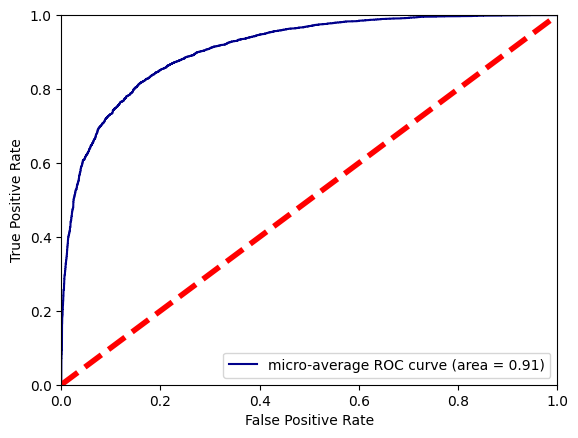

Epoch   1: Train Loss = 0.38544
Epoch   1: Train precision = 0.83277
Epoch   1: Train recall = 0.82768
Epoch   1: Train f1 score = 0.82617
Epoch   1: Train accuracy = 0.82877
Epoch   1: Valid Loss = 0.38001
Epoch   1: Valid precision = 0.80184
Epoch   1: Valid recall = 0.84727
Epoch   1: Valid f1_score = 0.82178
Epoch   1: Acurracy = 0.82389
The current loss: tensor(0.3800)
Epoch   2: Train Loss = 0.38124
Epoch   2: Train precision = 0.83484
Epoch   2: Train recall = 0.83422
Epoch   2: Train f1 score = 0.83028
Epoch   2: Train accuracy = 0.83109
Epoch   2: Valid Loss = 0.37581
Epoch   2: Valid precision = 0.83131
Epoch   2: Valid recall = 0.80960
Epoch   2: Valid f1_score = 0.81798
Epoch   2: Acurracy = 0.82744
The current loss: tensor(0.3758)
Epoch   3: Train Loss = 0.37971
Epoch   3: Train precision = 0.83524
Epoch   3: Train recall = 0.83126
Epoch   3: Train f1 score = 0.83005
Epoch   3: Train accuracy = 0.83165
Epoch   3: Valid Loss = 0.37773
Epoch   3: Valid precision = 0.84717
Ep

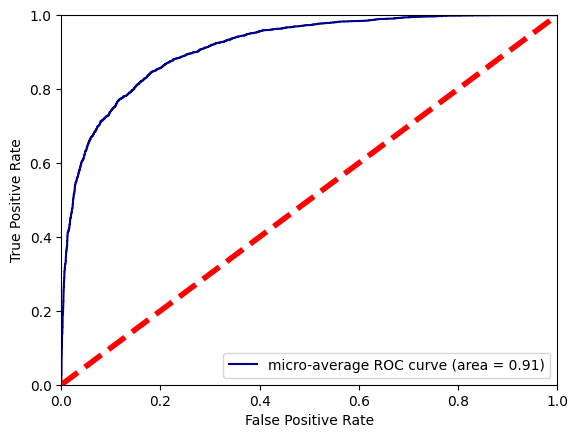

Epoch   6: Train Loss = 0.37364
Epoch   6: Train precision = 0.83421
Epoch   6: Train recall = 0.83764
Epoch   6: Train f1 score = 0.83273
Epoch   6: Train accuracy = 0.83382
Epoch   6: Valid Loss = 0.39311
Epoch   6: Valid precision = 0.76764
Epoch   6: Valid recall = 0.89693
Epoch   6: Valid f1_score = 0.82487
Epoch   6: Acurracy = 0.81663
The current loss: tensor(0.3931)
trigger times: 2
Early stopping!
Start to test process.


In [ ]:
from sklearn.metrics import f1_score,recall_score,precision_score,classification_report,roc_curve,auc,accuracy_score
from sklearn.preprocessing import label_binarize

epochs = 15

list_loss_train = []
list_epochs = []
list_loss = []
list_f1_scores_train = []
list_f1_scores = []
list_recalls_train = []
list_recalls = []
list_precisions_train = []
list_precisions = []
the_last_loss = 50
patience = 2
trigger_times = 0
for epoch in range(epochs):
  model.train()
  batch_losses = []
  batch_f1_scores = []
  batch_recalls = []
  batch_precisions = []
  batch_accuracy = []
  for x_batch, y_batch in train_loader:
   x_batch = x_batch.view(len(x_batch),1,300)
   y_pred = model(x_batch)
   #y_batch.clone().detach().requires_grad_(True)
   loss = loss_func(y_pred.squeeze(), y_batch)
   batch_losses.append(loss.item())
   preds = torch.round(y_pred).squeeze()

   Preds = preds.tolist()
   Y_batch = y_batch.tolist()
   batch_f1_scores.append(f1_score(Y_batch, Preds))
   batch_recalls.append(recall_score(Y_batch, Preds))
   batch_precisions.append(precision_score(Y_batch, Preds))
   batch_accuracy.append(accuracy_score(Y_batch, Preds))
    #Delete previously stored gradients
   optimizer.zero_grad()

    #Perform backpropagation starting from the loss calculated in this epoch
   loss.backward()
   # Clip params
   nn.utils.clip_grad_norm_(model.parameters(), max_norm=0.75)
    #Update model's weights based on the gradients calculated during backprop
   optimizer.step()
  print(f"Epoch {epoch:3}: Train Loss = {sum(batch_losses)/len(train_loader):.5f}")
  print(f"Epoch {epoch:3}: Train precision = {sum(batch_precisions)/len(train_loader):.5f}")
  print(f"Epoch {epoch:3}: Train recall = {sum(batch_recalls)/len(train_loader):.5f}")
  print(f"Epoch {epoch:3}: Train f1 score = {sum(batch_f1_scores)/len(train_loader):.5f}")
  print(f"Epoch {epoch:3}: Train accuracy = {sum(batch_accuracy)/len(train_loader):.5f}")
  list_loss_train.append(sum(batch_losses)/len(train_loader))
  list_f1_scores_train.append(sum(batch_f1_scores)/len(train_loader))
  list_precisions_train.append(sum(batch_precisions)/len(train_loader))
  list_recalls_train.append(sum(batch_recalls)/len(train_loader))

  with torch.no_grad():
    model.eval()
    Y_batches = []
    Y_preds = []
    F1 = []
    precision = []
    recall = []
    accuracy = []
    batch_losses_val = []
    for x,y in valid_loader:
      x = x.view(len(x),1,300).to(device)
      y_predict = model(x)
      #y_predict = model1(x)
      #y.clone().detach()
      val_loss = loss_func(y_predict.squeeze(),y)
      batch_losses_val.append(val_loss)
      y_pr = torch.round(y_predict).squeeze()

      Y_p = y_pr.tolist()
      y_val = y.tolist()
      F1.append(f1_score(y_val, Y_p))

      precision.append(precision_score(y_val, Y_p))
      recall.append(recall_score(y_val, Y_p))
      accuracy.append(accuracy_score(y_val,Y_p))
      Y_batches.append(y)
      Y_preds.append(y_predict)

    Y_batches = torch.cat(Y_batches)
    Y_preds = torch.cat(Y_preds)
    print(f"Epoch {epoch:3}: Valid Loss = {sum(batch_losses_val)/len(valid_loader):.5f}")
    print(f"Epoch {epoch:3}: Valid precision = {sum(precision)/len(valid_loader):.5f}")
    print(f"Epoch {epoch:3}: Valid recall = {sum(recall)/len(valid_loader):.5f}")
    print(f"Epoch {epoch:3}: Valid f1_score = {sum(F1)/len(valid_loader):.5f}")
    print(f"Epoch {epoch:3}: Acurracy = {sum(accuracy)/len(valid_loader):.5f}")
    list_f1_scores.append(sum(F1)/len(valid_loader))
    list_loss.append(sum(batch_losses_val)/len(valid_loader))
    list_precisions.append(sum(precision)/len(valid_loader))
    list_recalls.append(sum(recall)/len(valid_loader))
    list_epochs.append(epoch)
    the_current_loss = sum(batch_losses_val)/len(valid_loader)
    print('The current loss:', the_current_loss)
    if the_current_loss > the_last_loss:
            trigger_times += 1
            print('trigger times:', trigger_times)

            if trigger_times >= patience:
                print('Early stopping!\nStart to test process.')
                break;

    the_last_loss = the_current_loss
  if epoch % 5 == 0:

       Y_label = label_binarize(Y_batches, classes=[0, 1])

       fpr, tpr, _ = roc_curve(Y_label.ravel(), Y_preds.ravel())
       roc_auc= auc(fpr, tpr)

       plt.figure()
       plt.plot(
          fpr,
          tpr,
          label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc),
          color="darkblue",
       )
       plt.plot([0, 1], [0, 1], color="red",lw=4, linestyle="--")
       plt.xlim([0.0, 1.0])
       plt.ylim([0.0, 1.0])
       plt.xlabel("False Positive Rate")
       plt.ylabel("True Positive Rate")
       plt.legend(loc="lower right")
       plt.show()



Text(0.5, 1.0, 'loss-score')

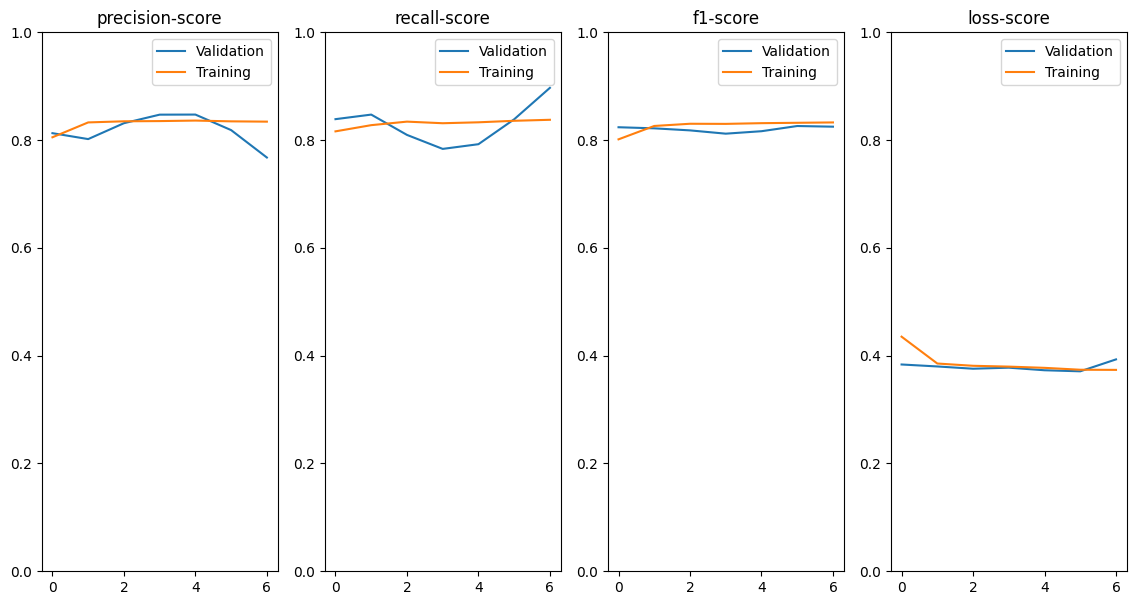

In [ ]:
plt.subplots(1,4, figsize = (14,7))
plt.subplot(1,4,1)
plt.plot(list_epochs, list_precisions)
plt.plot(list_epochs, list_precisions_train)
plt.ylim(ymin = 0.0 ,ymax = 1.0)
plt.legend(["Validation", "Training"])
plt.title("precision-score")

plt.subplot(1,4,2)
plt.plot(list_epochs, list_recalls)
plt.plot(list_epochs, list_recalls_train)
plt.ylim(ymin = 0.0 ,ymax = 1.0)
plt.legend(["Validation", "Training"])
plt.title("recall-score")

plt.subplot(1,4,3)
plt.plot(list_epochs, list_f1_scores)
plt.plot(list_epochs, list_f1_scores_train)
plt.ylim(ymin = 0.0 ,ymax = 1.0)
plt.legend(["Validation", "Training"])
plt.title("f1-score")

plt.subplot(1,4,4)
plt.plot(list_epochs, list_loss)
plt.plot(list_epochs, list_loss_train)
plt.ylim(ymin = 0.0, ymax = 1.0)
plt.legend(["Validation", "Training"])
plt.title("loss-score")

<ipython-input-63-bac5eb1aa4a3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['review']= test_data['review'].apply(lambda x:basic_preprocessing(x))
<ipython-input-63-bac5eb1aa4a3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['review']= test_data['review'].apply(lambda x:remove_duplicates(x))
<ipython-input-63-bac5eb1aa4a3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

Epoch  14: Valid Loss = 0.36854
Epoch  14: Valid precision = 0.85090
Epoch  14: Valid recall = 0.80919
Epoch  14: Valid f1_score = 0.82703
Epoch  14: Acurracy = 0.83457


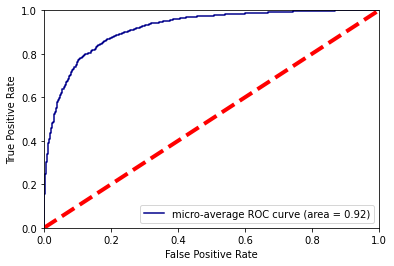

In [ ]:
test_data = dataset[0:4000]
if test_data is not None:
  test_data['review']= test_data['review'].apply(lambda x:basic_preprocessing(x))
  test_data['review']= test_data['review'].apply(lambda x:remove_duplicates(x))
  test_data['review']= test_data['review'].apply(lambda x:remove_stopwords(x))

  Y3 = test_data[['rating']]

  Y3.loc[Y3['rating'] <= 4.0, 'rating'] = 0.0
  Y3.loc[Y3['rating'] >= 7.0, 'rating'] = 1.0

  documents_test = []
  for i in range(len(test_data)):
   documents_test.append(test_data['review'][i])

  X_test = []
  Y_test = []
  for i in range(len(documents_test)):
    X3 = np.zeros(300)
    count_words = 0
    for word in range(len(documents_test[i])):
      try:
        X3 = X3 + np.array(vocabulary[documents_test[i][word]])
        count_words += 1
      except:
        continue
    if count_words != 0:
       X3 = X3/count_words
    X_test.append(X3)
    Y_test.append(Y3['rating'][i])

  X_test = torch.tensor(np.asarray(X_test), dtype=torch.float, device=device)
  Y_test = torch.tensor(np.asarray(Y_test), dtype=torch.float, device=device)
  test_dataset = TensorDataset(X_test, Y_test)
  test_loader = DataLoader(test_dataset, batch_size=64, shuffle = True)
  Y_batches = []
  Y_preds = []
  F1_score = []
  precisions = []
  recalls = []
  Accuracy = []
  Batch_losses_val = []

  with torch.no_grad():
    model.eval()
    for X,Y in test_loader:
      Y_predict = model(X.view(len(X),1,300))
      val_loss = loss_func(Y_predict.squeeze(),Y)
      Batch_losses_val.append(val_loss)
      Y_pr = torch.round(Y_predict).squeeze()

      Y_preds.append(Y_predict)
      Y_p = Y_pr.tolist()
      y_val = Y.tolist()

      F1_score.append(f1_score(y_val, Y_p))

      precisions.append(precision_score(y_val, Y_p))
      recalls.append(recall_score(y_val, Y_p))
      Accuracy.append(accuracy_score(y_val,Y_p))
      Y_batches.append(Y)

    Y_batches = torch.cat(Y_batches)
    Y_preds = torch.cat(Y_preds)

    print(f"Epoch {epoch:3}: Valid Loss = {sum(Batch_losses_val)/len(test_loader):.5f}")
    print(f"Epoch {epoch:3}: Valid precision = {sum(precisions)/len(test_loader):.5f}")
    print(f"Epoch {epoch:3}: Valid recall = {sum(recalls)/len(test_loader):.5f}")
    print(f"Epoch {epoch:3}: Valid f1_score = {sum(F1_score)/len(test_loader):.5f}")
    print(f"Epoch {epoch:3}: Acurracy = {sum(Accuracy)/len(test_loader):.5f}")

  Y_label = label_binarize(Y_batches, classes=[0, 1])

  fpr, tpr, _ = roc_curve(Y_label.ravel(), Y_preds.ravel())
  roc_auc= auc(fpr, tpr)

  plt.figure()
  plt.plot(
     fpr,
     tpr,
     label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc),
     color="darkblue",
     )

  plt.plot([0, 1], [0, 1], color="red",lw=4, linestyle="--")
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")
  plt.legend(loc="lower right")
  plt.show()

In [ ]:
#Saving the model of no skip connections
torch.save(model.state_dict(), ('RNNSkip.pt'))
model.load_state_dict(torch.load('RNNSkip.pt'))
model.eval()

RNNSkip(
  (Dropout): Dropout(p=0.05, inplace=False)
  (cells_fwd): ModuleList(
    (0): LSTM(300, 8, batch_first=True)
    (1): LSTM(8, 8, batch_first=True)
    (2): LSTM(8, 8, batch_first=True)
    (3): LSTM(8, 8, batch_first=True)
    (4): LSTM(8, 8, batch_first=True)
    (5): LSTM(8, 8, batch_first=True)
    (6): LSTM(8, 8, batch_first=True)
    (7): LSTM(8, 8, batch_first=True)
    (8): LSTM(8, 8, batch_first=True)
    (9): LSTM(8, 8, batch_first=True)
    (10): LSTM(8, 8, batch_first=True)
    (11): LSTM(8, 8, batch_first=True)
    (12): LSTM(8, 8, batch_first=True)
    (13): LSTM(8, 8, batch_first=True)
  )
  (cells_bwd): ModuleList(
    (0): LSTM(300, 8, batch_first=True)
    (1): LSTM(8, 8, batch_first=True)
    (2): LSTM(8, 8, batch_first=True)
    (3): LSTM(8, 8, batch_first=True)
    (4): LSTM(8, 8, batch_first=True)
    (5): LSTM(8, 8, batch_first=True)
    (6): LSTM(8, 8, batch_first=True)
    (7): LSTM(8, 8, batch_first=True)
    (8): LSTM(8, 8, batch_first=True)
    (9)